In [1]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

One very iportant concept, especially for machine learning, is examining the relationship between two varaibles.
Take height and weight - as you look at taller people, they probably get heavier, but the relationship isn't exact. Danny DeVito is 4'8" and 194lb, NBA player Lonzo Ball is listed as 6'6" and 190lb! Clearly there's some variation in there.

We can analyze and measure the strength of these relationships of one varaible to another, and use that to better undertand our data, and do things like select varaibles for machine learning. 

A primary tool for examining these relationships is a scatter plot - one varaible on the X axis, the other on the Y, and a point for each value. The shape that all these points create will illustrate the relationship

In [2]:
#Load hieght weight data. 
df = pd.read_csv("cardio_train.csv", sep=";")
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

In [3]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [4]:
#Change the days into years, so it is more understandable
df["age"] = round(df["age"]/365, 0)
df.head()

id   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.0       2     168    62.0    110     80            1     1      0   
1   1  55.0       1     156    85.0    140     90            3     1      0   
2   2  52.0       1     165    64.0    130     70            3     1      0   
3   3  48.0       2     169    82.0    150    100            1     1      0   
4   4  48.0       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

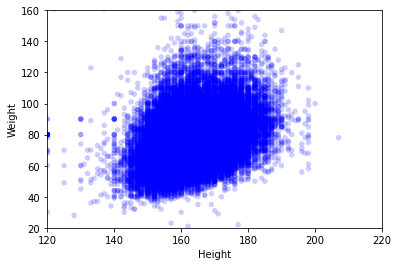

<Figure size 576x432 with 0 Axes>

In [5]:
#Create a scatterplot. Note scatterplots don't really need a preceeding object like a hist, it is just mapping points on a plot.
thinkplot.Scatter(df["height"], df["weight"])
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

As people get taller, they get heavier. It isn't an extremely clear relationship though. 

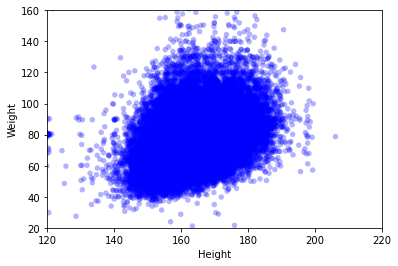

<Figure size 576x432 with 0 Axes>

In [6]:
#Add jitter
thinkplot.Scatter(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]), alpha=.3)
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

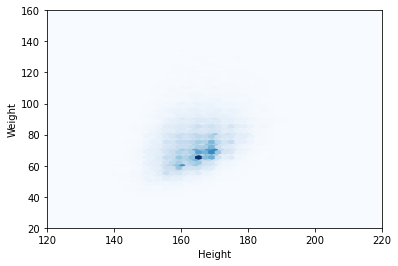

<Figure size 576x432 with 0 Axes>

In [7]:
#Hexbin
thinkplot.HexBin(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]))
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

All of these visualizations show the same basic thing - the relationship between height and weight. 

We can measure the strength of that relationship, that's called correlation.

In [8]:
#Calculate both correlation metrics
a=df["height"].values.tolist()
b=df["weight"].values.tolist()
thinkstats2.Corr(a, b), thinkstats2.SpearmanCorr(a,b)
#a,b

(0.2909678349914979, 0.3135692698998496)

In [9]:
#Cut down data to only numeric values, and fliter out some outliers. 
df2 = df[["age", "gender", "height", "weight", "ap_lo", "ap_hi"]]
df2 = df2[(df2["height"]>110) & (df2["height"] < 200)]

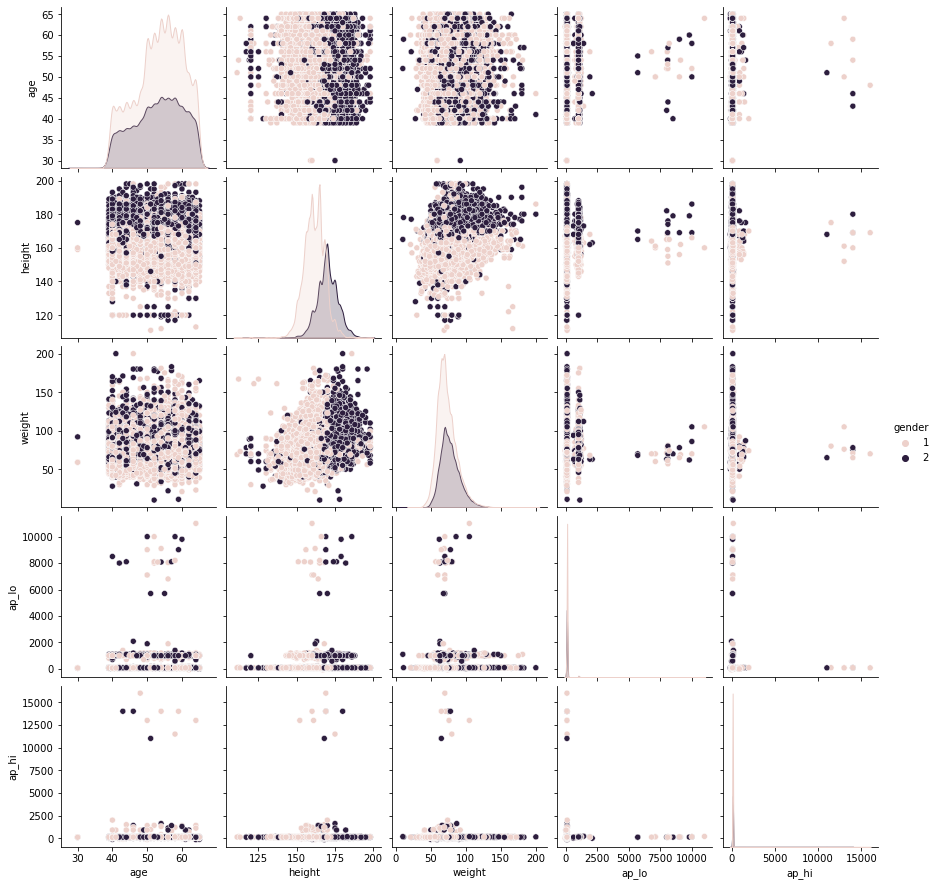

In [10]:
#Generate pairplot
sns.pairplot(df2, dropna=True, hue="gender")
plt.show()

<AxesSubplot:xlabel='height', ylabel='weight'>

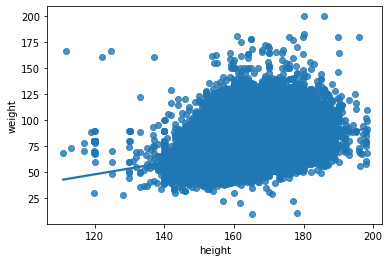

In [11]:
#Generate regression plot (pretty scatterplot with regression)
sns.regplot(x=df2["height"], y=df2["weight"], robust=True, data=df2, n_boot=1000, x_jitter=.2, y_jitter=.2, ci=85)

We can now load some different data, do some data cleanup, and look at correlations a bit more. 

In [12]:
#Load drug dataset and drop some values, so the total volume of data is manageable. 
drg = pd.read_csv("drug-use-by-age.csv")
drg = drg.drop(columns=["n", 'alcohol-frequency','marijuana-frequency', 'cocaine-frequency','crack-frequency', 'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency',
    'pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency', 'pain-releiver-use', 'stimulant-use'])
drg.head()

age  alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
0  12          3.9            1.1          0.1        0.0         0.1   
1  13          8.5            3.4          0.1        0.0         0.0   
2  14         18.1            8.7          0.1        0.0         0.1   
3  15         29.2           14.5          0.5        0.1         0.2   
4  16         40.1           22.5          1.0        0.0         0.1   

   hallucinogen-use  inhalant-use  oxycontin-use  tranquilizer-use  meth-use  \
0               0.2           1.6            0.1               0.2       0.0   
1               0.6           2.5            0.1               0.3       0.1   
2               1.6           2.6            0.4               0.9       0.1   
3               2.1           2.5            0.8               2.0       0.3   
4               3.4           3.0            1.1               2.4       0.3   

   sedative-use  
0           0.2  
1           0.1  
2           0.2  
3           0.4  
4           0.2

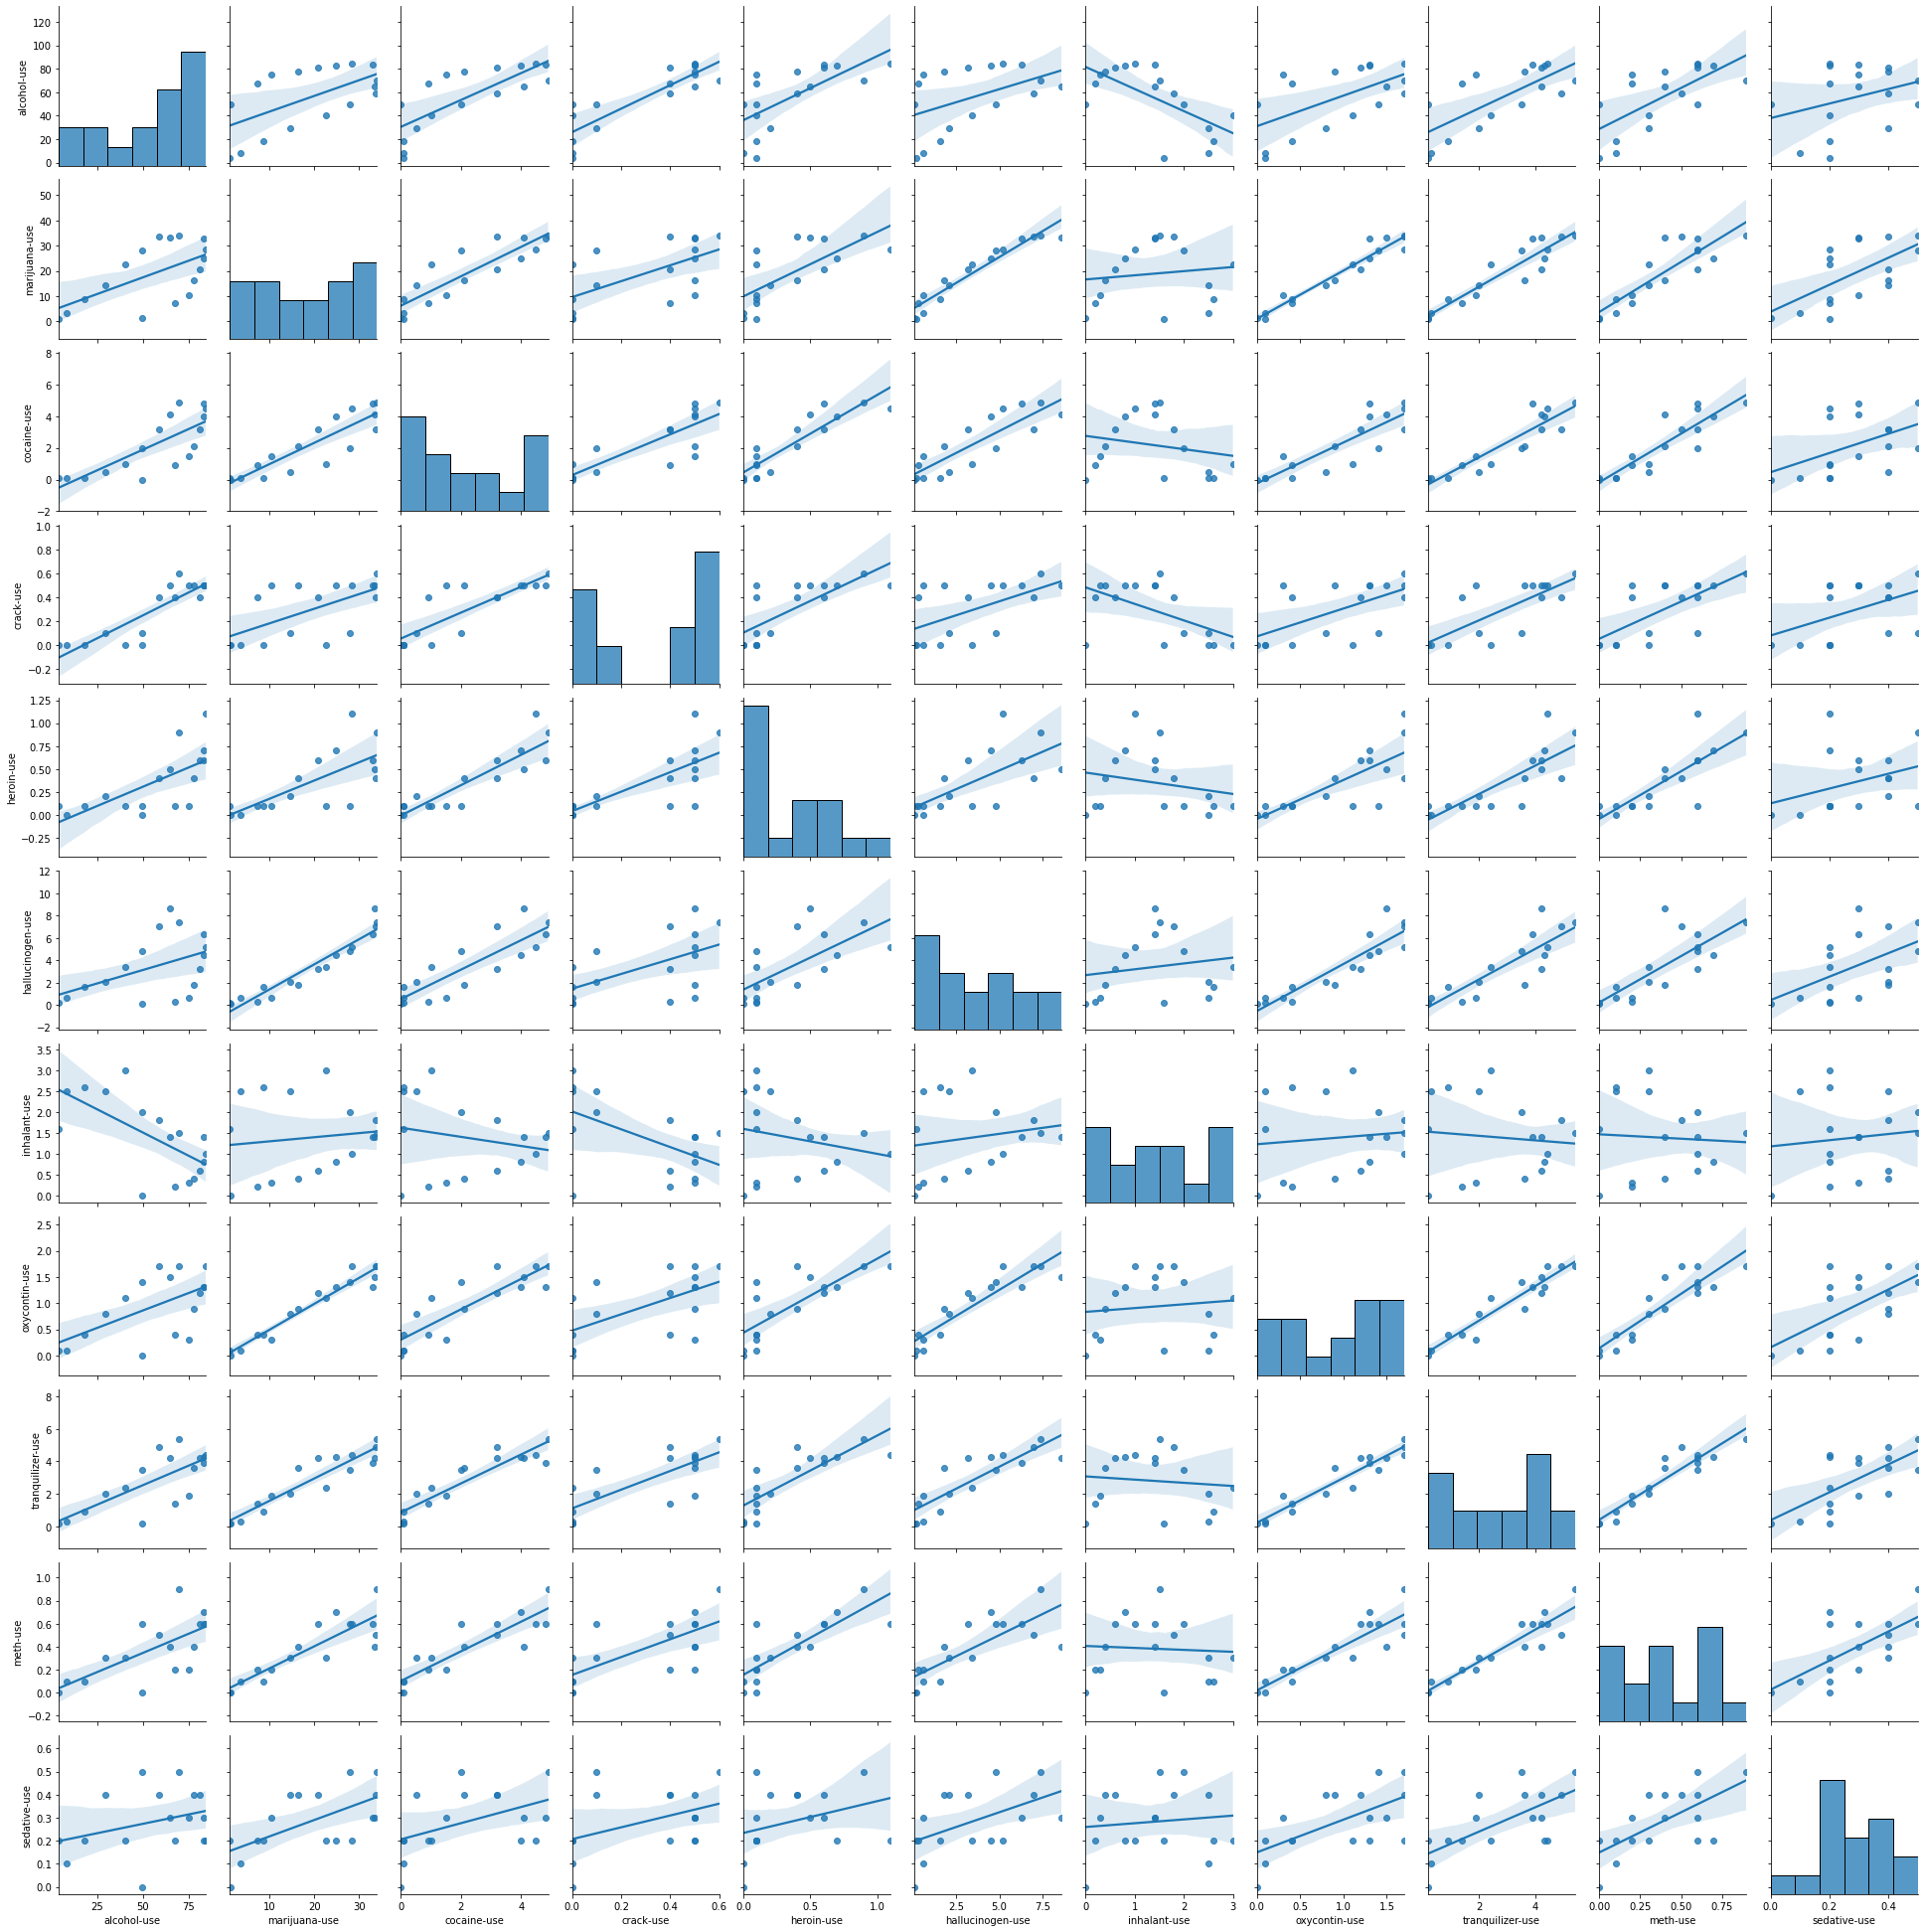

In [13]:
#Generate pairplot
sns.pairplot(drg, dropna=True, kind="reg")
plt.show()

In [14]:
#Take the data in our dataframe, and change it into a set of correlations. 
drg2 = drg.apply(pd.to_numeric, errors='coerce')
drg2 = drg2.drop(columns=["age"])
drg2 = drg2.corr()
drg2.head()

alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
alcohol-use       1.000000       0.594165     0.773458   0.877378    0.677614   
marijuana-use     0.594165       1.000000     0.883789   0.620670    0.711613   
cocaine-use       0.773458       0.883789     1.000000   0.835727    0.899944   
crack-use         0.877378       0.620670     0.835727   1.000000    0.750790   
heroin-use        0.677614       0.711613     0.899944   0.750790    1.000000   

               hallucinogen-use  inhalant-use  oxycontin-use  \
alcohol-use            0.463702     -0.648248       0.589219   
marijuana-use          0.959353      0.127336       0.971733   
cocaine-use            0.855668     -0.214609       0.865626   
crack-use              0.556222     -0.543499       0.603003   
heroin-use             0.683674     -0.215961       0.775321   

               tranquilizer-use  meth-use  sedative-use  
alcohol-use            0.735785  0.682531      0.318268  
marijuana-use          0.935199  0.870446      0.616766  
cocaine-use            0.920430  0.889353      0.461914  
crack-use              0.772651  0.694324      0.438421  
heroin-use             0.818583  0.816620      0.333649

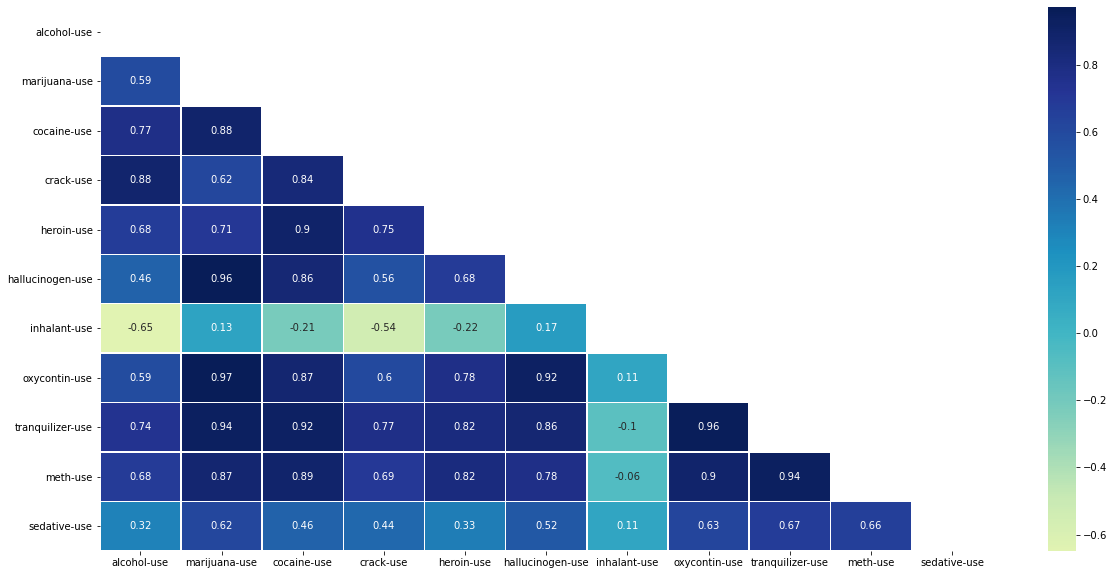

In [15]:
#Show Correlations in heatmap
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(drg2, dtype=bool))
sns.heatmap(drg2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

We can use our newfound correlation skills to look at something near and dear to my heart - diabetes!

In this data we have a bunch of common values that are tracked for diabetic people, the Outcome varaible is a measure of if that person has diabetes. 

Part 1: Load some data and take a preview. Look for correlations visually and calculate some that appear to be correlated numerically. 

In [16]:
#Read Diabetic Data and change to mmol/L, ditch 0 glucose (errors)
d = pd.read_csv("diabetes.csv")
d["Glucose"] = d["Glucose"]/18.018
d = d[d["Glucose"] > 0]
d.head()

Pregnancies    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6   8.214008             72             35        0  33.6   
1            1   4.717505             66             29        0  26.6   
2            8  10.156510             64              0        0  23.3   
3            1   4.939505             66             23       94  28.1   
4            0   7.603508             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [17]:
#Describe data
d.describe(include="all")

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   763.000000  763.000000     763.000000     763.000000  763.000000   
mean      3.851900    6.753622      69.115334      20.477064   80.292267   
std       3.374729    1.694730      19.399240      15.973171  115.457448   
min       0.000000    2.442002       0.000000       0.000000    0.000000   
25%       1.000000    5.494505      62.000000       0.000000    0.000000   
50%       3.000000    6.493506      72.000000      23.000000   36.000000   
75%       6.000000    7.825508      80.000000      32.000000  128.500000   
max      17.000000   11.044511     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  763.000000                763.000000  763.000000  763.000000  
mean    31.986763                  0.472477   33.271298    0.348624  
std      7.893221                  0.331963   11.772161    0.476847  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243500   24.000000    0.000000  
50%     32.000000                  0.374000   29.000000    0.000000  
75%     36.550000                  0.626500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

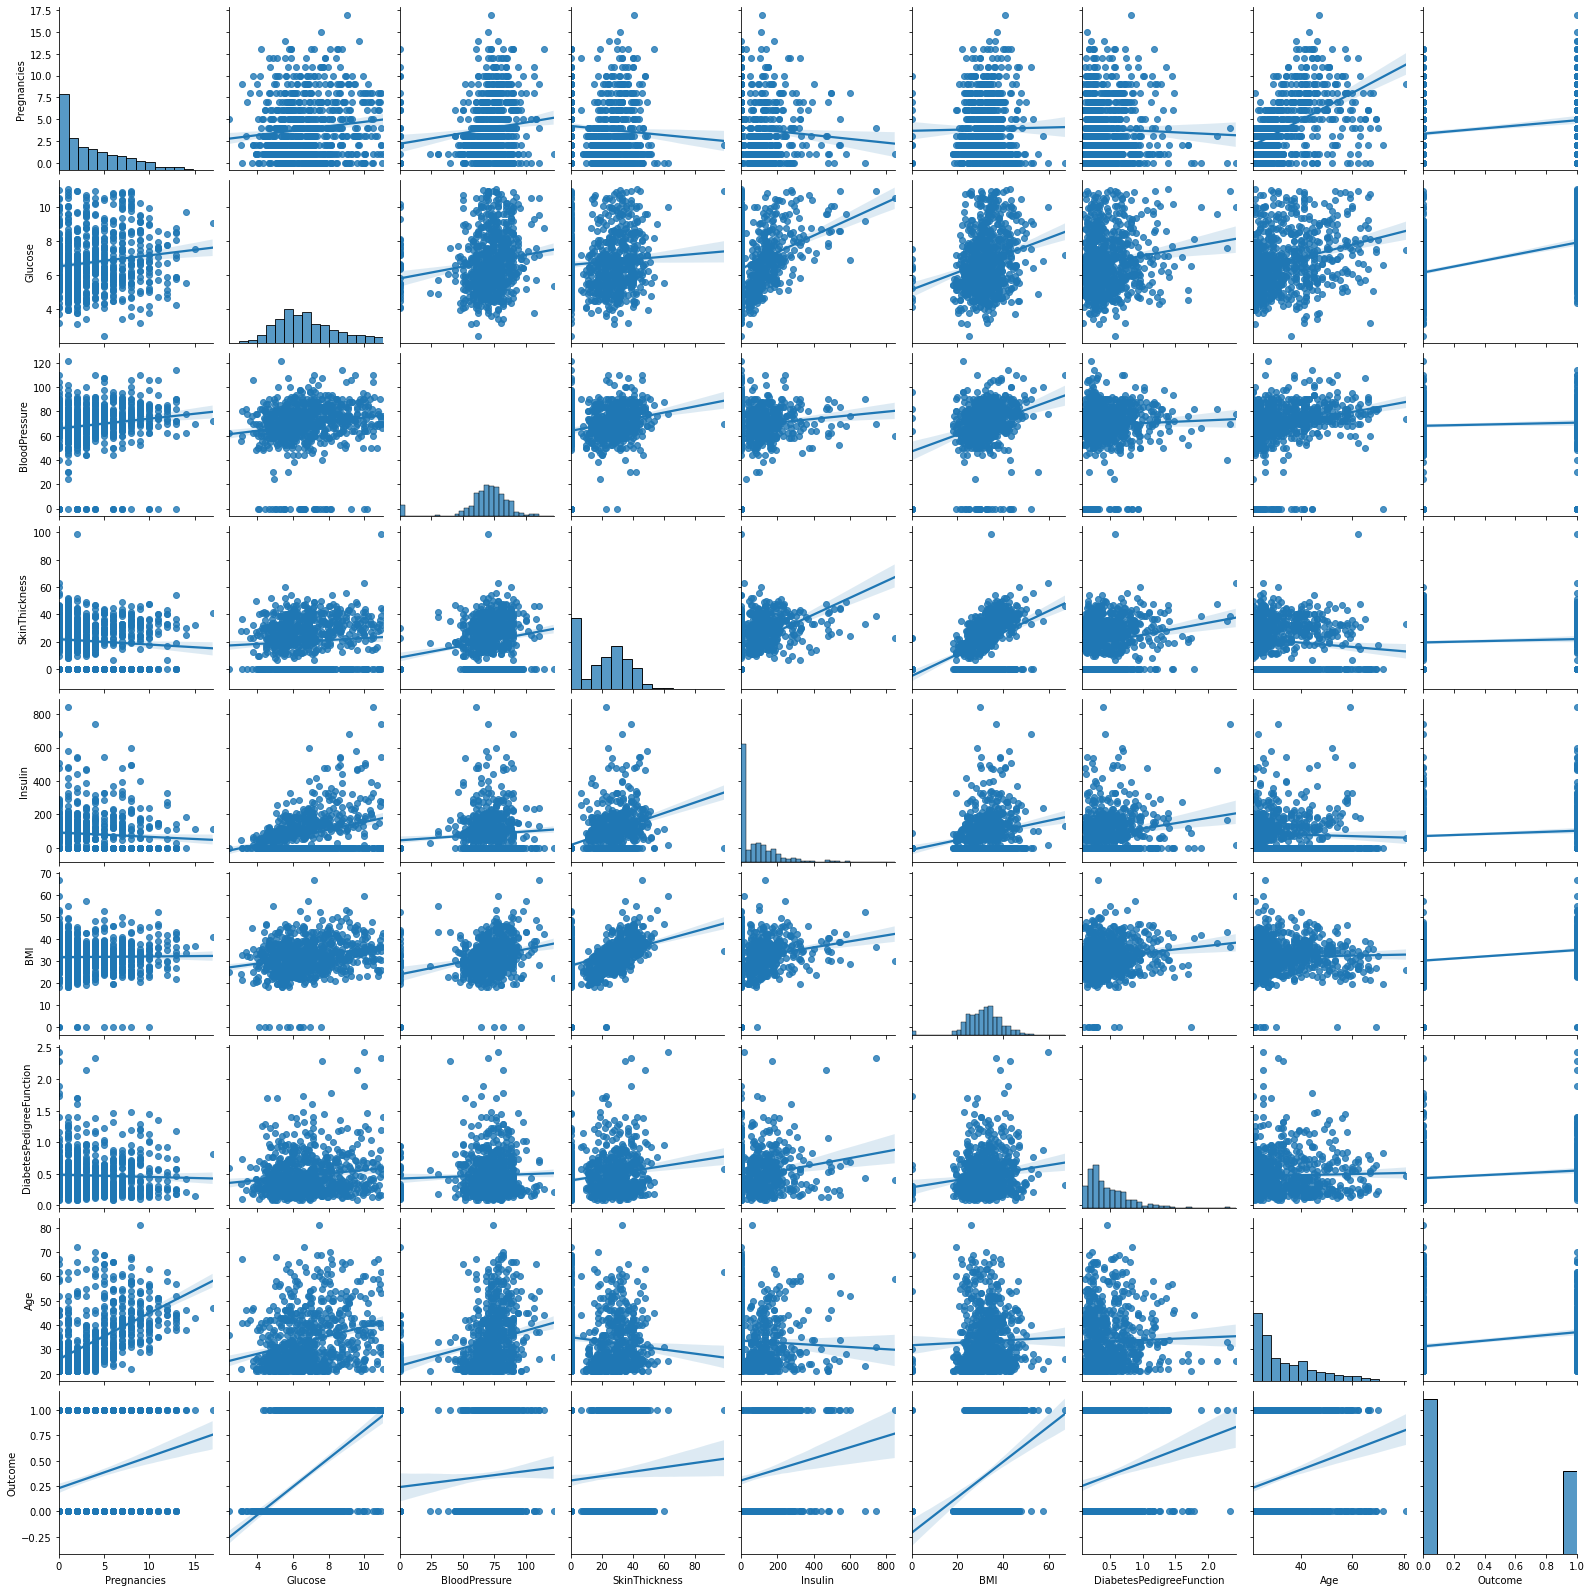

In [18]:
#Look for correlations visually
sns.pairplot(d, dropna=True, kind="reg")
plt.show()

In [19]:
#Calculate some correleations
print("BMI-SkinThickness:", thinkstats2.Corr(d["BMI"], d["SkinThickness"]), thinkstats2.SpearmanCorr(d["BMI"], d["SkinThickness"]))
print("Glucose-Insulin:", thinkstats2.Corr(d["Glucose"], d["Insulin"]), thinkstats2.SpearmanCorr(d["Glucose"], d["Insulin"]))
print("Glucose-BP:", thinkstats2.Corr(d["Glucose"], d["BloodPressure"]), thinkstats2.SpearmanCorr(d["Glucose"], d["BloodPressure"]))

BMI-SkinThickness: 0.3915418904645855 0.44152005708796255
Glucose-Insulin: 0.3315502520494515 0.20834359330446126
Glucose-BP: 0.15842934449388996 0.23540832428307323


One thing jumped out there - there are several things with 0 or near 0 values that don't make sense, e.g. Blood Pressure. 

We should clean up our data and then look again. 

NOTE: Do not filter out 0 Insulin people, that is a valid measure. 
Part 2: Refine our examination. This time, add: hue="Outcome" as an argument in the pairplot. 

In [20]:
#Filter out 0s. Rerun graphs. 
d = d[d["BloodPressure"] > 0]
d = d[d["SkinThickness"] > 0]
d = d[d["BMI"] > 0]

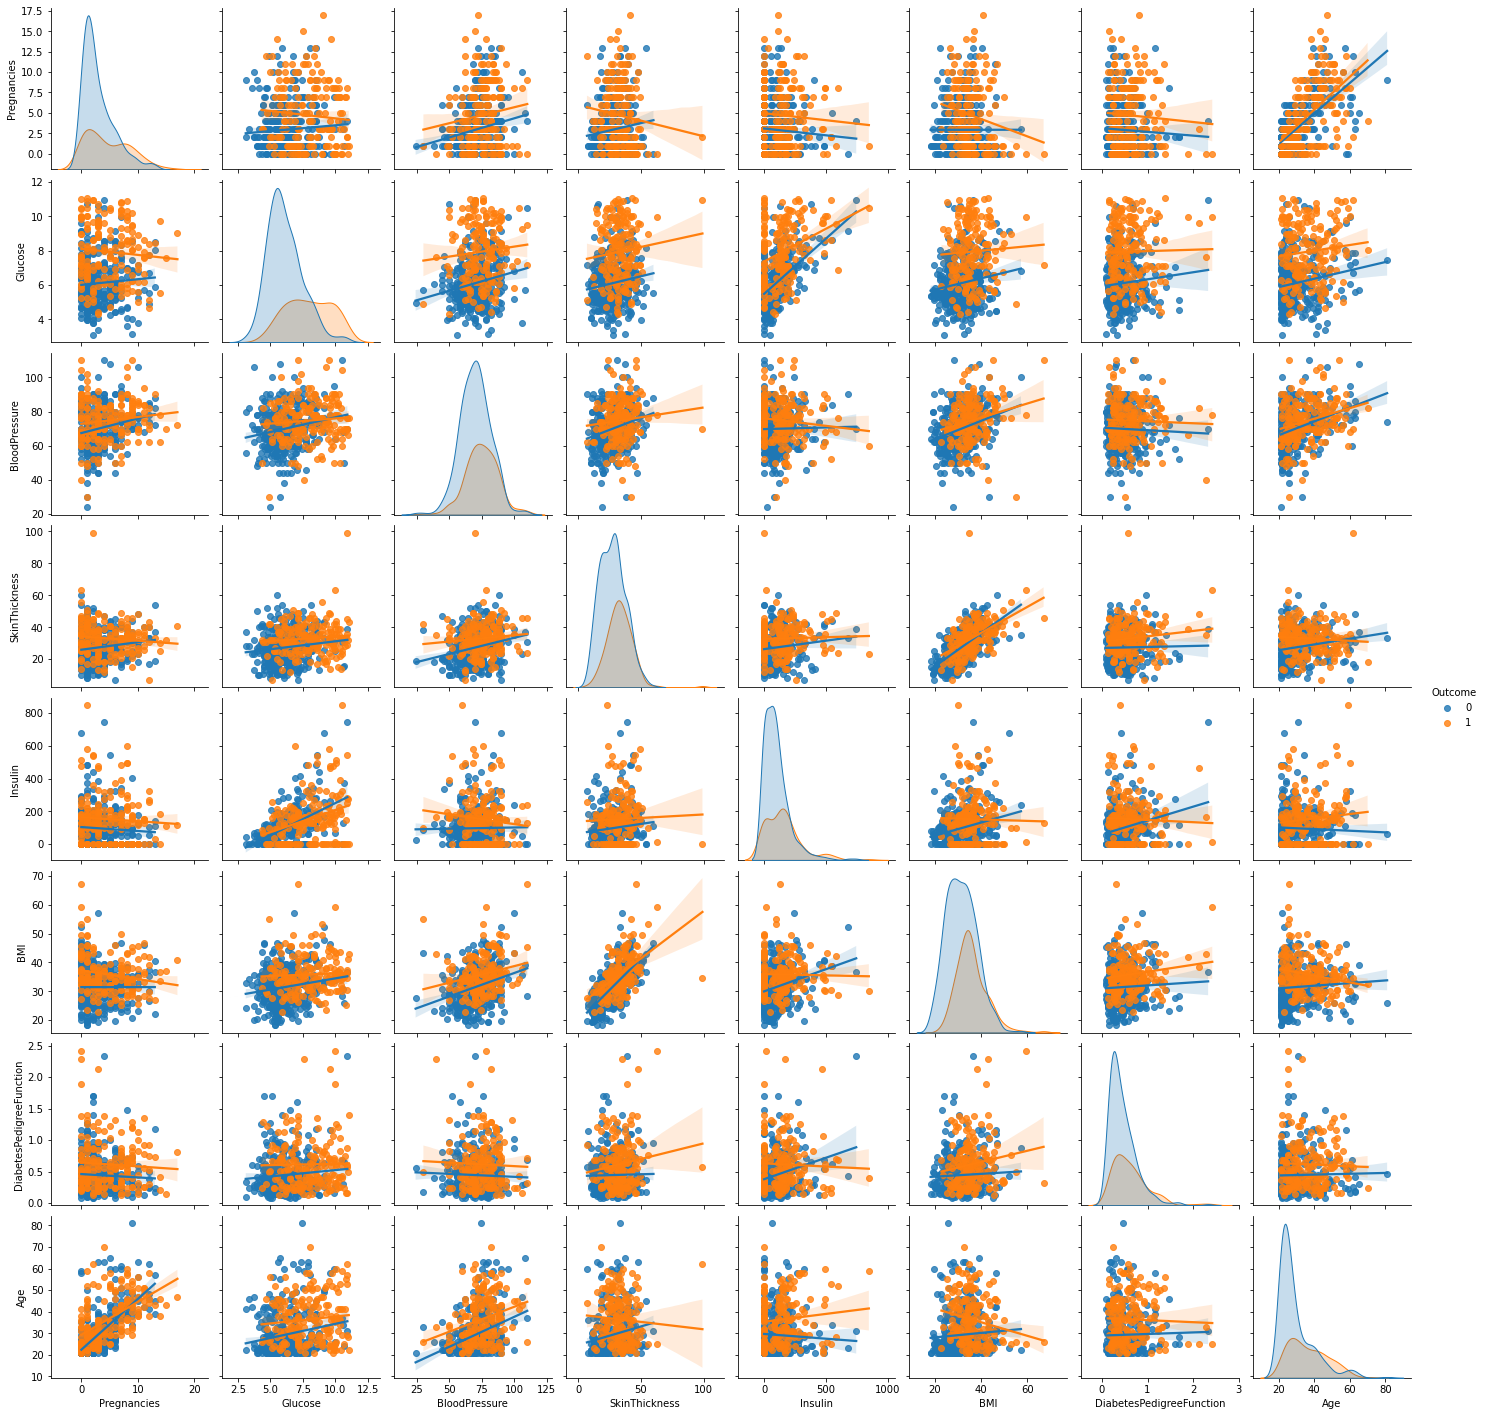

In [21]:
#Look for correlations visually
sns.pairplot(d, dropna=True, kind="reg", hue="Outcome")
plt.show()

That cleans up our data a little. Since this data is about a glucose test, we can detour to examine glucose more closely...

Part 3: Examine the distribution of glucose:

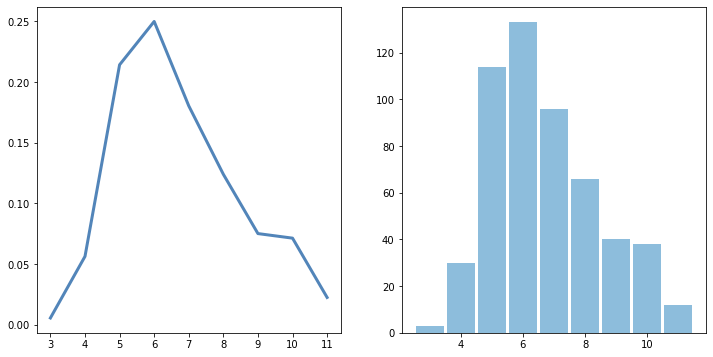

In [22]:
#Look at glucose overall first. 
thinkplot.PrePlot(2,1,2)
pmf = thinkstats2.Pmf(round(d["Glucose"], 0))
thinkplot.Pdf(pmf)
thinkplot.SubPlot(2)
hist = thinkstats2.Hist(round(d["Glucose"],0))
thinkplot.Hist(hist)
thinkplot.Config()

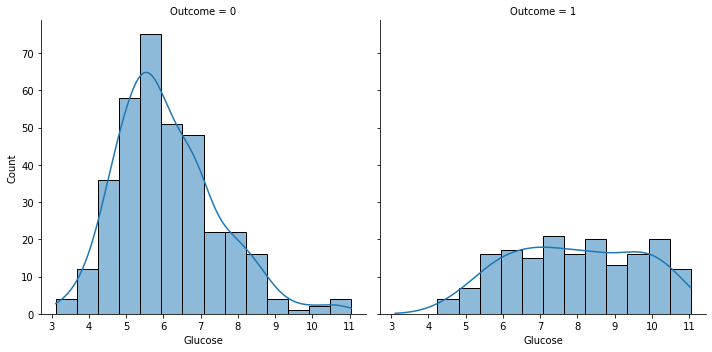

In [23]:
#Split by if you're diabetic or not. 
#NOTE THIS ONE USES A NEW SNS FUNCTION. IT MAY NOT WORK FOR YOU. USE DISTPLOT LIKE THE PREVIOUS EXAMPLE AND ADAPT IT
#OR USE THINKPLOT LIKE ABOVE. THIS DEPENDS ON THE VERSION OF SEABORN THAT IS INSTALLED ON YOUR COMPUTER, NOT ANYTHING YOU'VE DONE.
sns.displot(data=d, x="Glucose", kde=True, col="Outcome")

Whoa! Way different. Diabetic people are in shambles and normal people are... well... normal. 

We can take our normal people and treat them as normal - quick detour into analytical distributions....

Part 4: Take non diabetic people and create analytical distribution for them. 

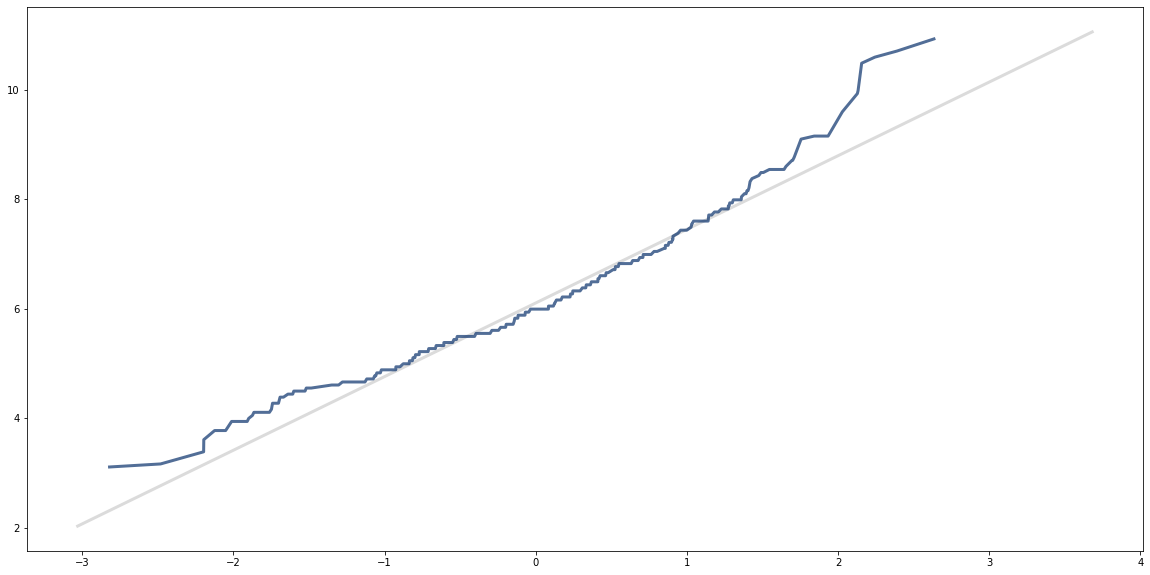

In [24]:
#Non-Diabetic people are normal!
d_neg = d[d["Outcome"]==0]
thinkstats2.NormalProbabilityPlot(d_neg["Glucose"])

The normal probability plot looks pretty good. Why don't we make an analytical distribution out of our data?

In [25]:
#Create a normal distribution. Because we have stated "it is normal", we only need mean and std to define it. 
norm = ss.norm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std())
#Print some stats... Note mean and median. 
norm.cdf(6), norm.median(), norm.mean()

(0.4686761767496125, 6.105944134113151, 6.105944134113151)

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


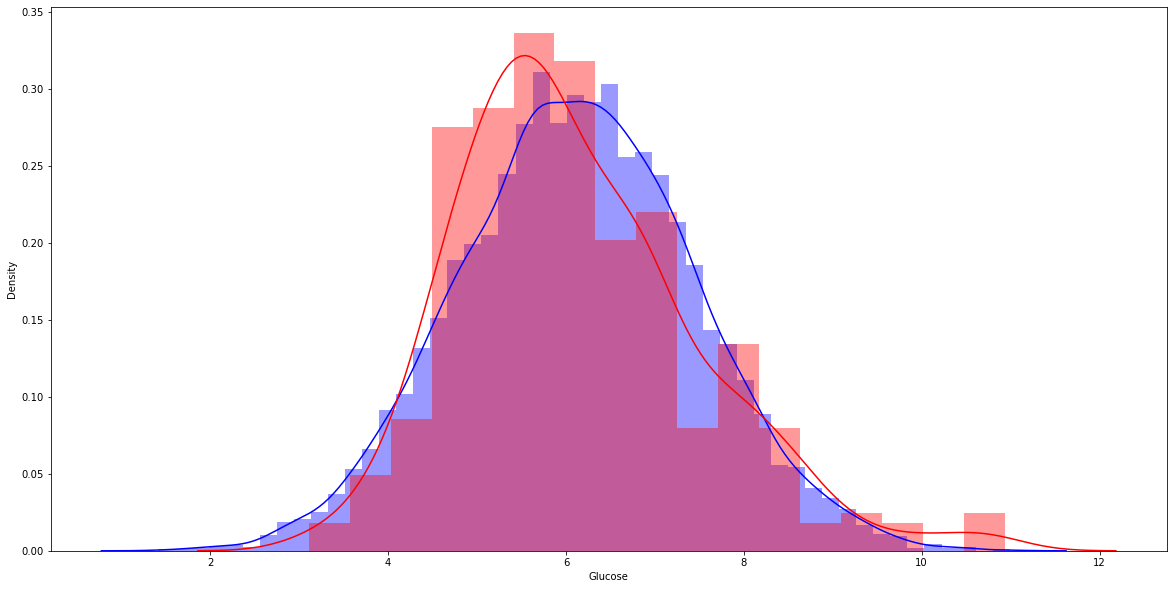

In [26]:
#Create a histogram - We will take our new distribution and create some random values mirroring that
sns.distplot(norm.rvs(size=10000), color="blue")
sns.distplot(d_neg["Glucose"], color="red")
plt.show()

By doing what we just did there, we effectively said - this is the distribution of glucose for non-diabetics, it is defined by this formula. The "ss.norm..." generates that formula if you provide mean and std. We can use that new analytical model to do stuff, like graph....

What may be concerning about that...?

Our distribution is more or less normal, but not perfect. Maybe we should consider the skew, and try to make it more accurate?

Part 5: Try to make more accurate analytic models

In [27]:
#What about muh skew?
#Skewnorm is another distribution - a normal one with some skew. We calculate it, and pass it to our distribution with a=
a = thinkstats2.PearsonMedianSkewness(d_neg["Glucose"])
norms = ss.skewnorm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std(), a=a)
norms.cdf(6), norms.median(), norms.mean(), a

(0.32237529711751256,
 6.579562544275761,
 6.584512629174157,
 0.49688186044462557)

We can also just tell the system to figure it out for us....

In [28]:
#Create a model that is fitted to the data, automagically.
ae, loce, scalee = ss.skewnorm.fit(d_neg["Glucose"])
snormFit = ss.skewnorm(ae, loce, scalee)


C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

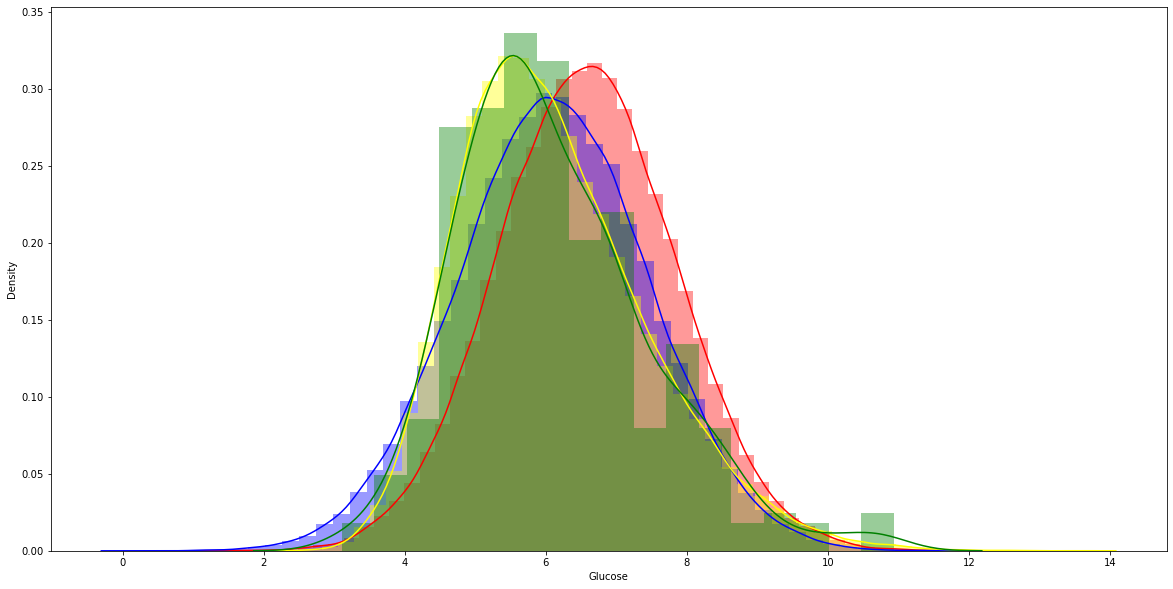

In [29]:
#Plot all the distributions together. 
sns.distplot(norms.rvs(size=100000), color="red")
sns.distplot(norm.rvs(size=100000), color="blue")
sns.distplot(snormFit.rvs(size=100000), color="yellow")
sns.distplot(d_neg["Glucose"], color="green")
plt.show()

Once we have an analytical distribution that mirrors our data closely enough, we can use it. Some caveats:

- The more data we have, the more likely we are able to make an accurate model. Generalizing from a small amount of data is more risky. 

- The closer the distribution is to the distribution you pick, the better. Many are normal, but not all. 

- Does our sample realistically match the population we are modelling? For us, this data comes from a glucose tolerance test, which is one way that doctors diagnose diabetes. You're given a glass of orange juice, then your blood sugar is measured 2 hours later. If it is really high, you're probably diabetic. Most people who have no medical issues wouldn't do this, so we probably should expect our data to be different than the total population. 

In [30]:
#How many people have a blood glucose in an optimal range (3.9-5.4)
low = 3.9
high = 5.4

cdfNeg = thinkstats2.Cdf(d_neg["Glucose"])

print("Normal Distribution:", norm.cdf(high)-norm.cdf(low))
print("Skew Distribution:", norms.cdf(high)-norms.cdf(low))
print("Fitted Distribution:", snormFit.cdf(high)-snormFit.cdf(low))
print("Fitted Distribution:", cdfNeg.Prob(high)-cdfNeg.Prob(low))

Normal Distribution: 0.24937189383105512
Skew Distribution: 0.15757668143726933
Fitted Distribution: 0.30902025021684254
Fitted Distribution: 0.3098591549295775


Enough with the normies, we can go back to looking at diabetics.

For people with diabetes, inspect for correlations. 

Part 6: Dead pancreas society

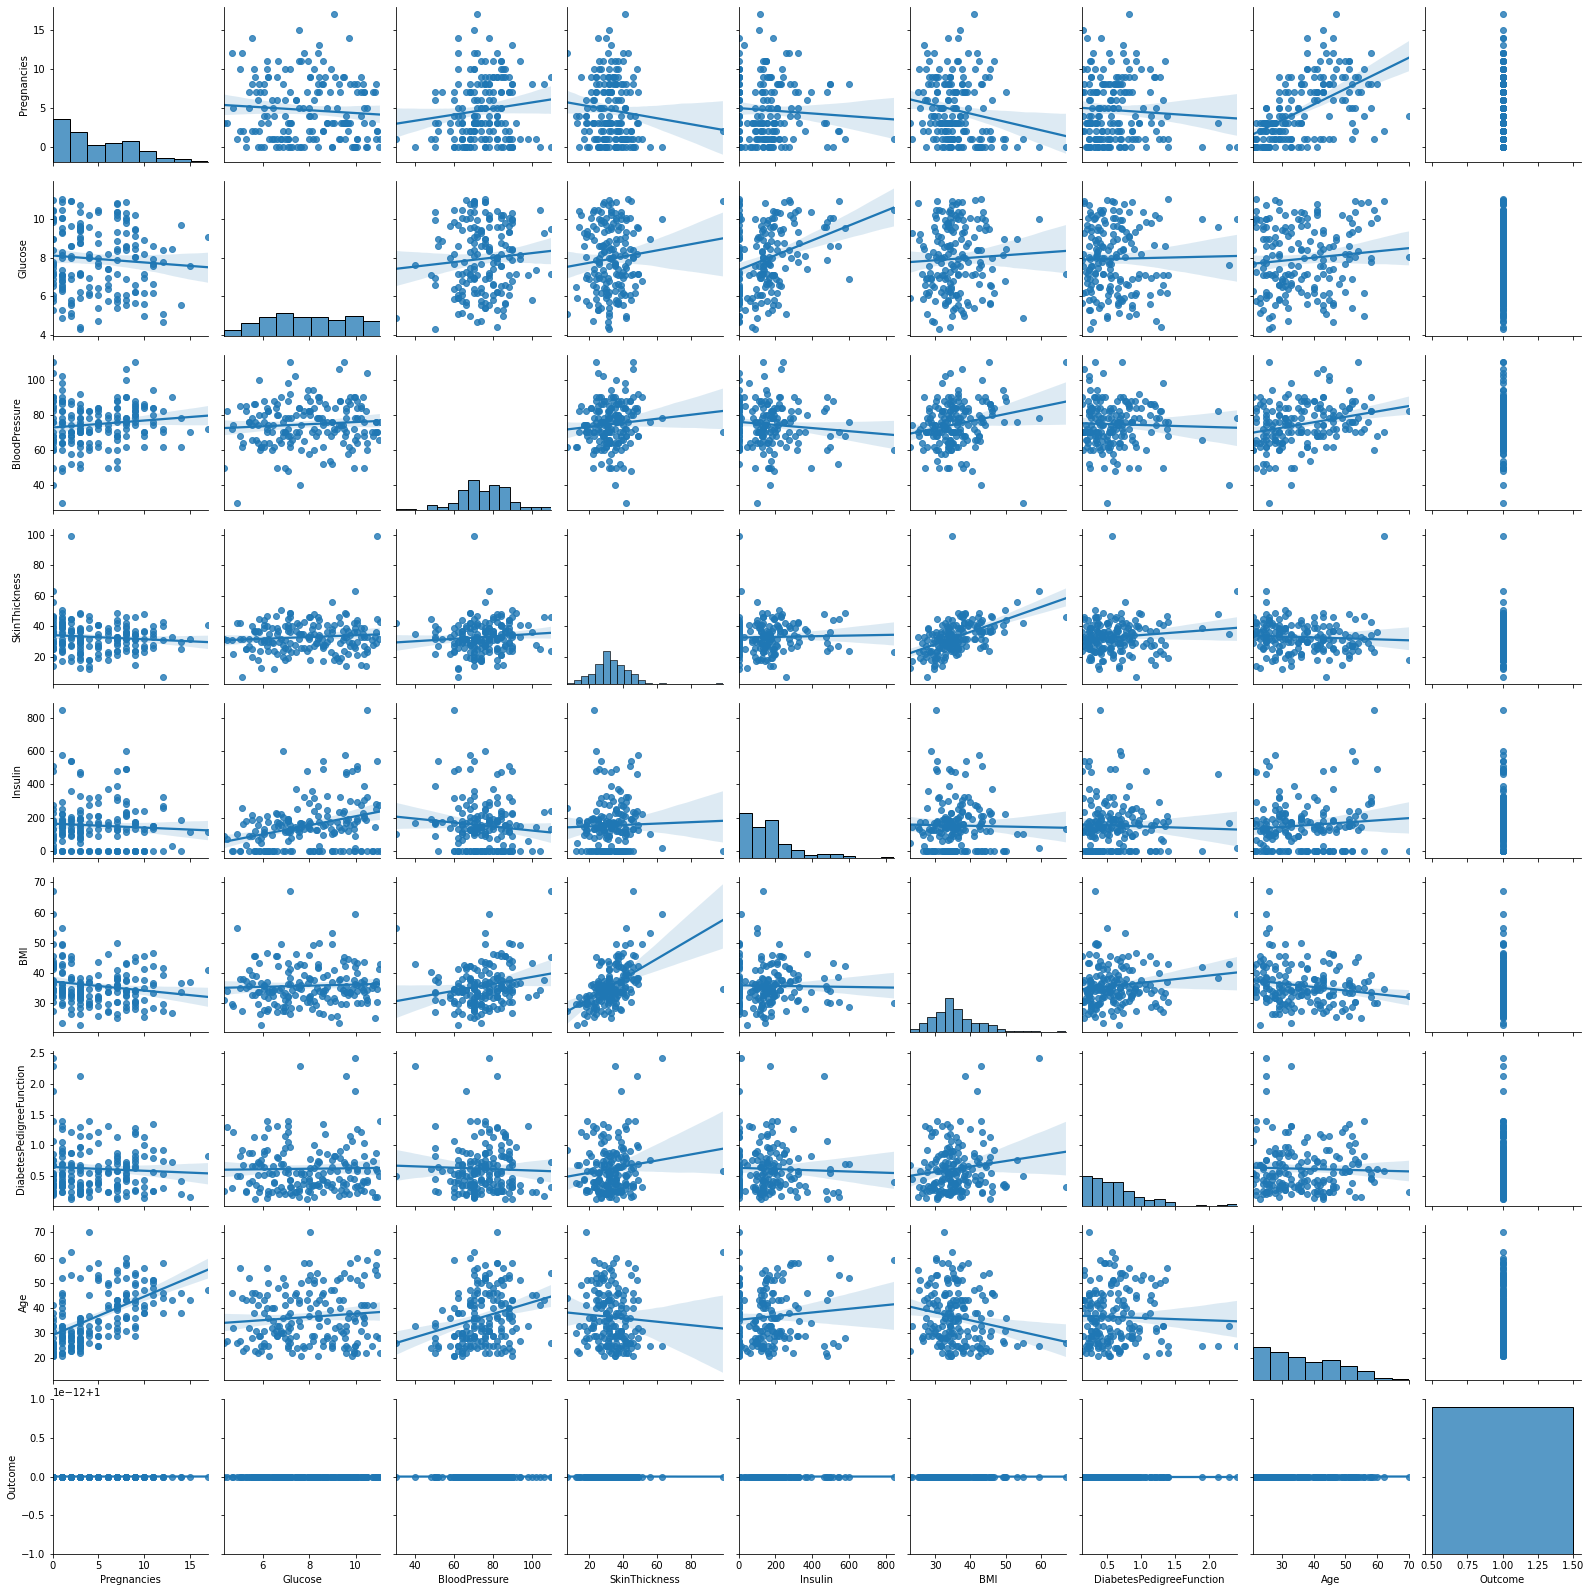

In [31]:
#Take diabetic people and look for correlations
d_pos = d[d["Outcome"] == 1]
sns.pairplot(d_pos, dropna=True, kind="reg")
plt.show()

In [32]:
#Calculate some correleations
print("BMI-SkinThickness:", thinkstats2.Corr(d_pos["BMI"], d_pos["SkinThickness"]), thinkstats2.SpearmanCorr(d_pos["BMI"], d_pos["SkinThickness"]))
print("Glucose-Insulin:", thinkstats2.Corr(d_pos["Glucose"], d_pos["Insulin"]), thinkstats2.SpearmanCorr(d_pos["Glucose"], d_pos["Insulin"]))
print("Glucose-BP:", thinkstats2.Corr(d_pos["Glucose"], d_pos["BloodPressure"]), thinkstats2.SpearmanCorr(d_pos["Glucose"], d_pos["BloodPressure"]))

BMI-SkinThickness: 0.517318143290913 0.5631067788957849
Glucose-Insulin: 0.3226157058306132 0.30835176079988386
Glucose-BP: 0.08387629356042058 0.059170274306849506


Part 7: Correlation Matrix for diabetics. 

In [33]:
#Create correlation dataframe
tmp = d_pos.drop(columns=["Outcome"])
posCor = tmp.corr()
posCor.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000 -0.080580       0.125040      -0.101702 -0.064018   
Glucose          -0.080580  1.000000       0.083876       0.095935  0.322616   
BloodPressure     0.125040  0.083876       1.000000       0.094917 -0.102904   
SkinThickness    -0.101702  0.095935       0.094917       1.000000  0.030456   
Insulin          -0.064018  0.322616      -0.102904       0.030456  1.000000   

                    BMI  DiabetesPedigreeFunction       Age  
Pregnancies   -0.179583                 -0.060414  0.553959  
Glucose        0.049547                  0.018666  0.102380  
BloodPressure  0.217539                 -0.035633  0.267244  
SkinThickness  0.517318                  0.129383 -0.066038  
Insulin       -0.019954                 -0.036761  0.098184

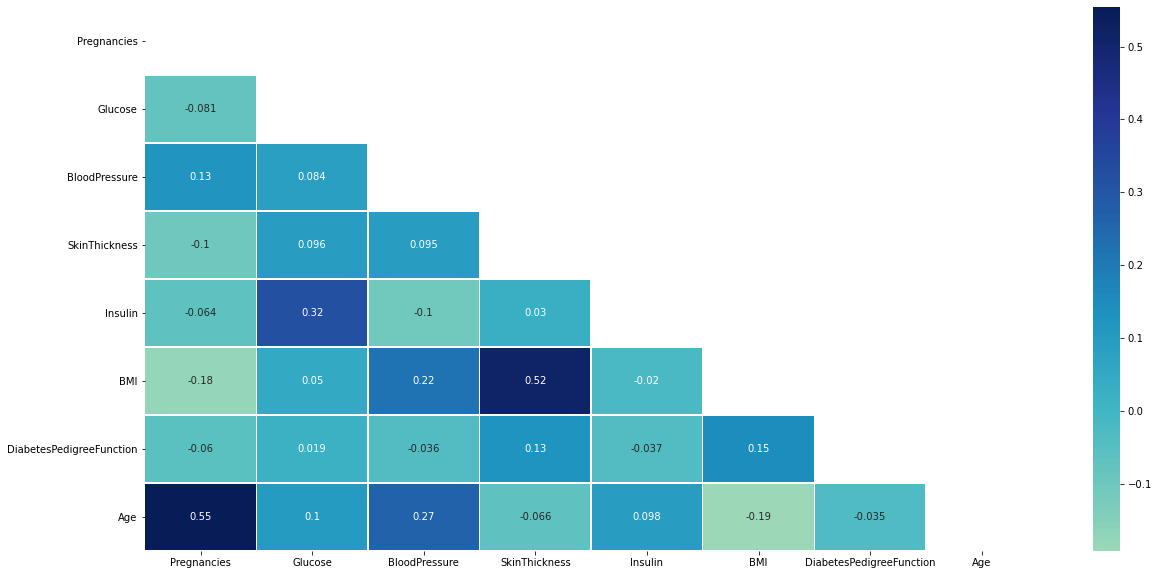

In [34]:
#Plot correlation matrix
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(posCor, dtype=bool))
sns.heatmap(posCor, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

One last thing that jumps out - the insulin column. If you are (type 1 fully) diabetic, you may have no insulin in your system. If you're type 2, you'd expect insulin to skyrocket. What if we split the data along that line?

Part 8: Segregate Insulin Havers 

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


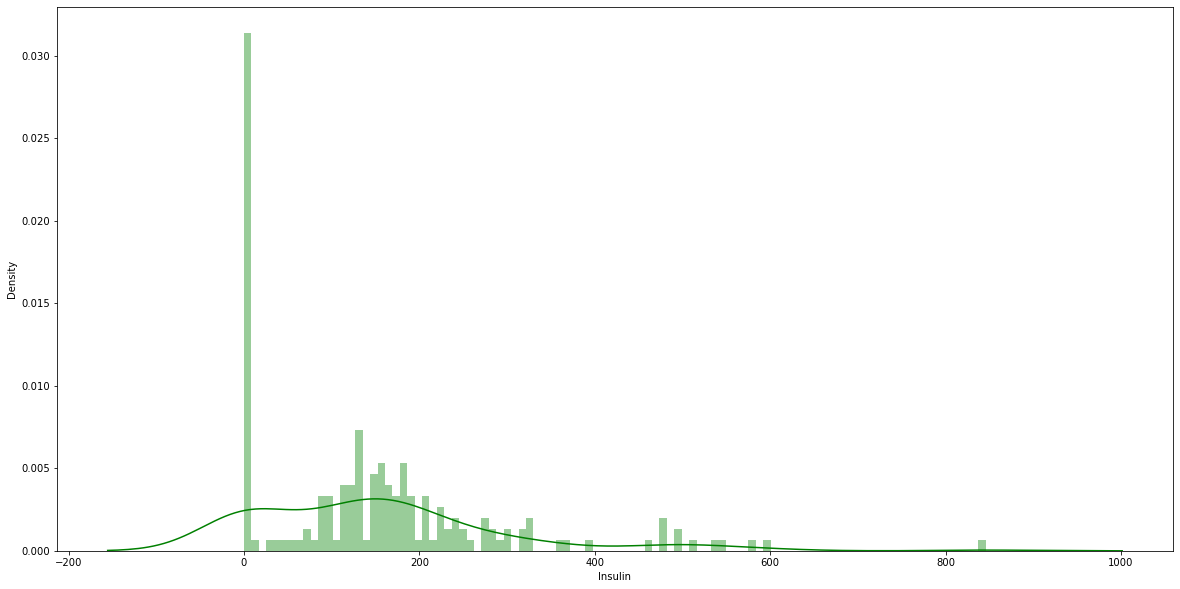

In [35]:
#Look for correlations
sns.distplot(d_pos["Insulin"], color="green", bins=100)
plt.show()

In [36]:
#Split into two groups. 
d_pos["HaveIns"] = (d_pos["Insulin"] > 50)
d_pos.head()

<ipython-input-36-3d8641111c0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_pos["HaveIns"] = (d_pos["Insulin"] > 50)


Pregnancies    Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6   8.214008             72             35        0  33.6   
4             0   7.603508             40             35      168  43.1   
6             3   4.329004             50             32       88  31.0   
8             2  10.933511             70             45      543  30.5   
13            1  10.489510             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  HaveIns  
0                      0.627   50        1    False  
4                      2.288   33        1     True  
6                      0.248   26        1     True  
8                      0.158   53        1     True  
13                     0.398   59        1     True

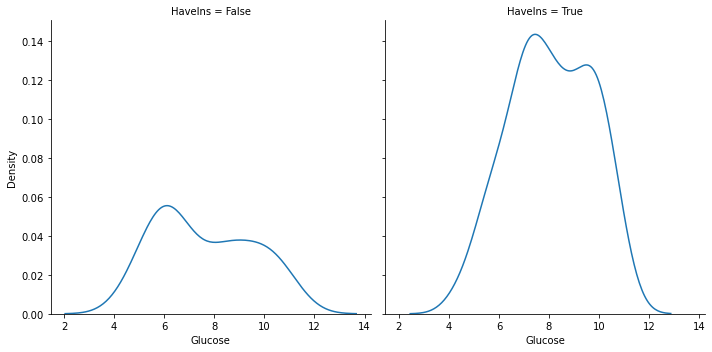

In [37]:
#Look at glucose for both
sns.displot(data=d_pos, x="Glucose", kind="kde", col="HaveIns")

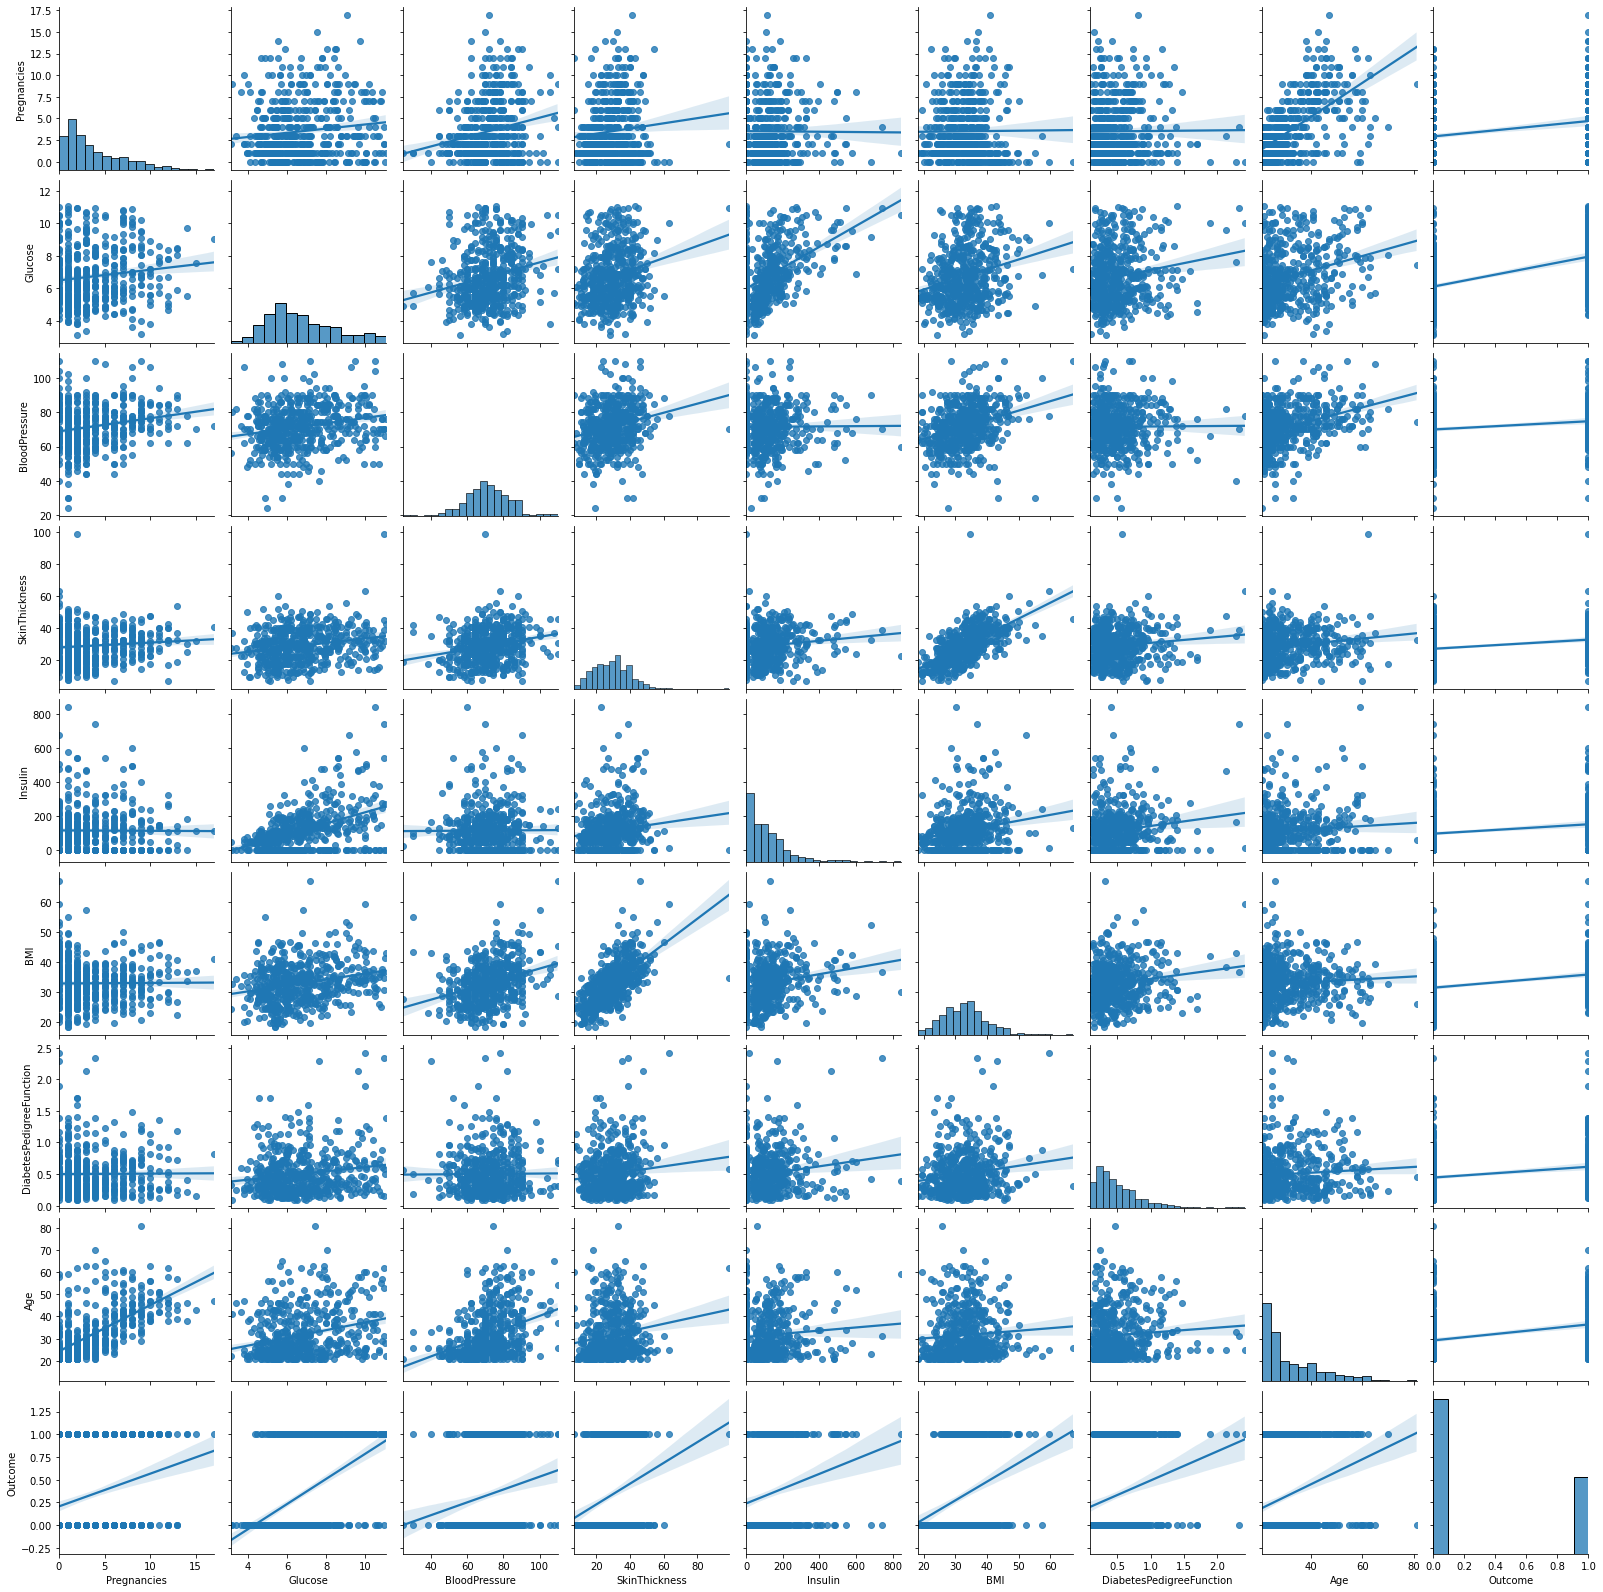

In [38]:
#Plot Insulin-y people for correlations. 
sns.pairplot(d, dropna=True, kind="reg")

plt.show()